### Import libraries

In [1]:
#pip install tensorflow_datasets

In [2]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

### Read the dataset: IMDB reviews

In [3]:
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

In [8]:
imdb

{'train': <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'test': <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'unsupervised': <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [9]:
train_data, test_data= imdb['train'], imdb['test']

In [13]:
type(train_data)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [14]:
training_sent=[]
training_labels=[]
testing_sent=[]
testing_labels=[]
for s,l in train_data:
    training_sent.append(str(s.numpy()))
    training_labels.append(l.numpy())
    
for s,l in test_data:
    testing_sent.append(str(s.numpy()))
    testing_labels.append(l.numpy())
    

In [19]:
training_labels[3]

1

In [20]:
training_sent[3]

"b'This is the kind of film for a snowy Sunday afternoon when the rest of the world can go ahead with its own business as you descend into a big arm-chair and mellow for a couple of hours. Wonderful performances from Cher and Nicolas Cage (as always) gently row the plot along. There are no rapids to cross, no dangerous waters, just a warm and witty paddle through New York life at its best. A family film in every sense and one that deserves the praise it received.'"

In [21]:
training_labels_final=np.array(training_labels)
testing_labels_final=np.array(testing_labels)

In [22]:
len(training_sent), len(testing_sent)

(25000, 25000)

In [23]:
training_labels_final.size, testing_labels_final.size

(25000, 25000)

In [24]:
vocab_size=10000
embedding_dim=16
max_length= 120
trunc_type= 'post'

In [27]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [29]:
tokenizer= Tokenizer(num_words= vocab_size)
tokenizer.fit_on_texts(training_sent)
word_index= tokenizer.word_index
word_index;
len(word_index)

86538

In [31]:
word_index;

In [34]:
sequences= tokenizer.texts_to_sequences(training_sent)
padded= pad_sequences(sequences, maxlen= max_length,
                     truncating= trunc_type)
testing_sequences= tokenizer.texts_to_sequences(testing_sent)
testing_padded=pad_sequences(testing_sequences,maxlen=max_length)

In [35]:
len(sequences)

25000

In [36]:
len(sequences[0])

110

In [37]:
len(padded[0])

120

In [39]:
padded.shape

(25000, 120)

In [40]:
padded.dtype

dtype('int32')

### Build model of Simple RNN

In [44]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Embedding

In [45]:
model_rnn=Sequential([
    Embedding(vocab_size,embedding_dim,input_length=max_length),
    SimpleRNN(32),
    Dense(10, activation='relu'),
    Dense(1,activation='sigmoid')
])


In [46]:
model_rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1568      
                                                                 
 dense (Dense)               (None, 10)                330       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 161909 (632.46 KB)
Trainable params: 161909 (632.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compile the RNN model

In [47]:
model_rnn.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

In [48]:
history= model_rnn.fit(padded, training_labels_final,epochs=10,
                      validation_data=(testing_padded,testing_labels_final))

Epoch 1/10



782/782 [==============================] - 35s 42ms/step - loss: 0.6935 - accuracy: 0.5059 - val_loss: 0.6905 - val_accuracy: 0.5316
Epoch 2/10
782/782 [==============================] - 32s 41ms/step - loss: 0.6076 - accuracy: 0.6506 - val_loss: 0.4499 - val_accuracy: 0.7960
Epoch 3/10
782/782 [==============================] - 33s 42ms/step - loss: 0.3743 - accuracy: 0.8421 - val_loss: 0.4043 - val_accuracy: 0.8201
Epoch 4/10
782/782 [==============================] - 32s 41ms/step - loss: 0.2521 - accuracy: 0.9039 - val_loss: 0.5037 - val_accuracy: 0.8106
Epoch 5/10
782/782 [==============================] - 32s 42ms/step - loss: 0.2125 - accuracy: 0.9167 - val_loss: 0.5391 - val_accuracy: 0.7895
Epoch 6/10
782/782 [==============================] - 32s 41ms/step - loss: 0.1248 - accuracy: 0.9543 - val_loss: 0.7652 - val_accuracy: 0.7448
Epoch 7/10
782/782 [==============================] - 32s 41ms/step - loss: 0.0685 - accuracy: 0.9772 - val_loss: 0.7834 - val_accuracy: 0.7961
Epo

In [49]:
history.history

{'loss': [0.6935216188430786,
  0.607641339302063,
  0.374267578125,
  0.2520866096019745,
  0.21248003840446472,
  0.12481814622879028,
  0.06845491379499435,
  0.03334512934088707,
  0.03089195489883423,
  0.039371732622385025],
 'accuracy': [0.5058799982070923,
  0.6505600214004517,
  0.8420799970626831,
  0.9038800001144409,
  0.9166799783706665,
  0.9542800188064575,
  0.9772400259971619,
  0.989799976348877,
  0.9896799921989441,
  0.986519992351532],
 'val_loss': [0.6905083060264587,
  0.44993850588798523,
  0.40428075194358826,
  0.5036864280700684,
  0.5390753746032715,
  0.7651834487915039,
  0.7833775877952576,
  0.9642115831375122,
  1.010820746421814,
  0.995604395866394],
 'val_accuracy': [0.5315999984741211,
  0.7960000038146973,
  0.8200799822807312,
  0.8105599880218506,
  0.7894799709320068,
  0.7447999715805054,
  0.7961199879646301,
  0.7886800169944763,
  0.790880024433136,
  0.795199990272522]}

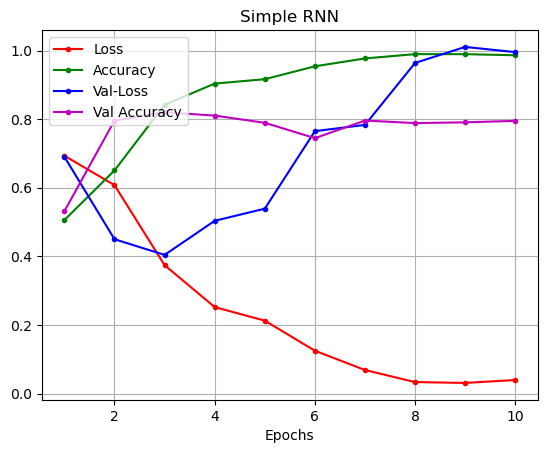

In [50]:
import matplotlib.pyplot as plt

plt.title('Simple RNN')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11), history.history['loss'], color='r', label='Loss',marker='.')
plt.plot(range(1,11), history.history['accuracy'], color='g', label='Accuracy',marker='.')
plt.plot(range(1,11), history.history['val_loss'], color='b', label='Val-Loss',marker='.')
plt.plot(range(1,11), history.history['val_accuracy'], color='m', label='Val Accuracy',marker='.')
plt.legend(loc='upper left')

### Build the model for LSTM

In [53]:
from keras.layers import Bidirectional, GRU, LSTM

In [54]:
model_lstm=Sequential([
    Embedding(vocab_size,embedding_dim,input_length=max_length),
    Bidirectional(LSTM(32)),
    Dense(10, activation='relu'),
    Dense(1,activation='sigmoid')
])


In [55]:
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional (Bidirection  (None, 64)                12544     
 al)                                                             
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 173205 (676.58 KB)
Trainable params: 173205 (676.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
model_lstm.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

### Train LSTM model

In [57]:
history1 = model_lstm.fit(padded, training_labels_final,epochs=10,
                      validation_data=(testing_padded,testing_labels_final))

Epoch 1/10
782/782 [==============================] - 52s 61ms/step - loss: 0.4498 - accuracy: 0.7810 - val_loss: 0.3462 - val_accuracy: 0.8494
Epoch 2/10
782/782 [==============================] - 46s 59ms/step - loss: 0.2854 - accuracy: 0.8852 - val_loss: 0.3474 - val_accuracy: 0.8486
Epoch 3/10
782/782 [==============================] - 46s 59ms/step - loss: 0.2274 - accuracy: 0.9130 - val_loss: 0.3695 - val_accuracy: 0.8447
Epoch 4/10
782/782 [==============================] - 47s 59ms/step - loss: 0.1847 - accuracy: 0.9309 - val_loss: 0.4412 - val_accuracy: 0.8357
Epoch 5/10
782/782 [==============================] - 46s 59ms/step - loss: 0.1427 - accuracy: 0.9489 - val_loss: 0.5690 - val_accuracy: 0.8286
Epoch 6/10
782/782 [==============================] - 47s 60ms/step - loss: 0.1123 - accuracy: 0.9604 - val_loss: 0.6140 - val_accuracy: 0.8260
Epoch 7/10
782/782 [==============================] - 46s 59ms/step - loss: 0.0842 - accuracy: 0.9708 - val_loss: 0.6522 - val_accuracy:

In [60]:
history1.history

{'loss': [0.4498150646686554,
  0.28539350628852844,
  0.22739090025424957,
  0.18471132218837738,
  0.14273543655872345,
  0.11229026317596436,
  0.08421590924263,
  0.0685482993721962,
  0.047933124005794525,
  0.04424545541405678],
 'accuracy': [0.7809600234031677,
  0.8852400183677673,
  0.9130399823188782,
  0.9308800101280212,
  0.9489200115203857,
  0.9604399800300598,
  0.9708399772644043,
  0.976639986038208,
  0.9841200113296509,
  0.9854000210762024],
 'val_loss': [0.34617698192596436,
  0.3474278450012207,
  0.36946040391921997,
  0.4411552846431732,
  0.5690413117408752,
  0.6139742732048035,
  0.652209997177124,
  0.7133549451828003,
  0.9546250104904175,
  0.7917754054069519],
 'val_accuracy': [0.8493599891662598,
  0.8485999703407288,
  0.8447200059890747,
  0.8357200026512146,
  0.8286399841308594,
  0.8259999752044678,
  0.8172399997711182,
  0.8226000070571899,
  0.8134400248527527,
  0.8199599981307983]}

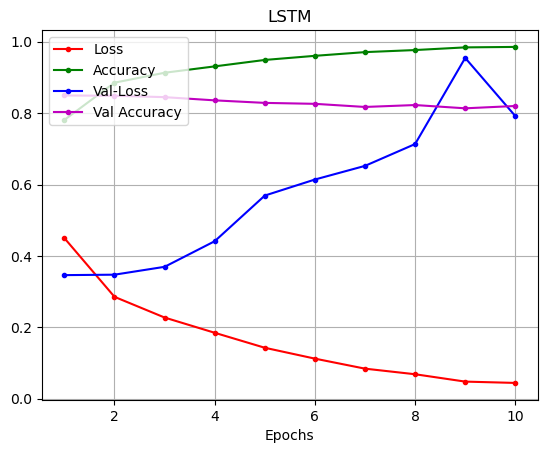

In [61]:
import matplotlib.pyplot as plt

plt.title('LSTM')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11), history1.history['loss'], color='r', label='Loss',marker='.')
plt.plot(range(1,11), history1.history['accuracy'], color='g', label='Accuracy',marker='.')
plt.plot(range(1,11), history1.history['val_loss'], color='b', label='Val-Loss',marker='.')
plt.plot(range(1,11), history1.history['val_accuracy'], color='m', label='Val Accuracy',marker='.')
plt.legend(loc='upper left')

# Build GRU model

In [63]:
model_gru=Sequential([
    Embedding(vocab_size,embedding_dim,input_length=max_length),
    Bidirectional(GRU(32)),
    Dense(10, activation='relu'),
    Dense(1,activation='sigmoid')
])

In [65]:
model_gru.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_2 (Bidirecti  (None, 64)                9600      
 onal)                                                           
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 170261 (665.08 KB)
Trainable params: 170261 (665.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [66]:
model_gru.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

In [68]:
history2 = model_gru.fit(padded, training_labels_final,epochs=10,
                      validation_data=(testing_padded,testing_labels_final))

Epoch 1/10
782/782 [==============================] - 56s 66ms/step - loss: 0.5318 - accuracy: 0.7196 - val_loss: 0.3711 - val_accuracy: 0.8380
Epoch 2/10
782/782 [==============================] - 51s 65ms/step - loss: 0.3179 - accuracy: 0.8715 - val_loss: 0.3643 - val_accuracy: 0.8403
Epoch 3/10
782/782 [==============================] - 50s 64ms/step - loss: 0.2511 - accuracy: 0.9032 - val_loss: 0.3822 - val_accuracy: 0.8464
Epoch 4/10
782/782 [==============================] - 51s 65ms/step - loss: 0.2045 - accuracy: 0.9279 - val_loss: 0.4030 - val_accuracy: 0.8384
Epoch 5/10
782/782 [==============================] - 51s 65ms/step - loss: 0.1613 - accuracy: 0.9449 - val_loss: 0.5208 - val_accuracy: 0.8278
Epoch 6/10
782/782 [==============================] - 51s 65ms/step - loss: 0.1303 - accuracy: 0.9564 - val_loss: 0.5209 - val_accuracy: 0.8308
Epoch 7/10
782/782 [==============================] - 51s 65ms/step - loss: 0.1026 - accuracy: 0.9682 - val_loss: 0.5553 - val_accuracy:

In [70]:
history2.history

{'loss': [0.5317968130111694,
  0.31793642044067383,
  0.25111672282218933,
  0.20448078215122223,
  0.16132359206676483,
  0.13026927411556244,
  0.10262498259544373,
  0.08036690205335617,
  0.06779663264751434,
  0.05332760885357857],
 'accuracy': [0.7196000218391418,
  0.8715199828147888,
  0.9031999707221985,
  0.9279199838638306,
  0.9448800086975098,
  0.9563599824905396,
  0.9682400226593018,
  0.9761599898338318,
  0.9796800017356873,
  0.9846400022506714],
 'val_loss': [0.37114089727401733,
  0.3643035590648651,
  0.3821777403354645,
  0.40302354097366333,
  0.5208477973937988,
  0.5209433436393738,
  0.5553367733955383,
  0.6118850708007812,
  0.700884222984314,
  0.7123609185218811],
 'val_accuracy': [0.8379999995231628,
  0.8403199911117554,
  0.8463600277900696,
  0.8384400010108948,
  0.8277599811553955,
  0.8307600021362305,
  0.8205199837684631,
  0.8224400281906128,
  0.819920003414154,
  0.8192399740219116]}

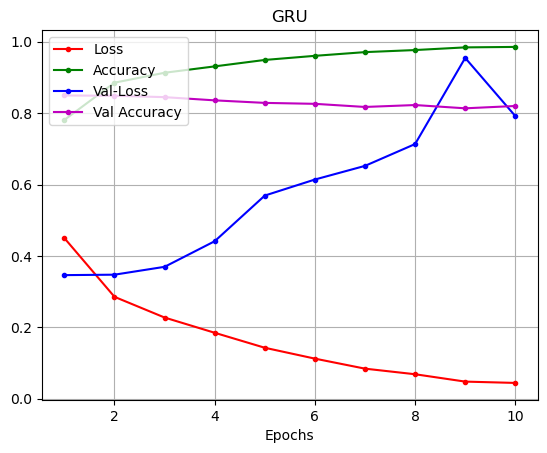

In [71]:
plt.title('GRU')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11), history2.history['loss'], color='r', label='Loss',marker='.')
plt.plot(range(1,11), history2.history['accuracy'], color='g', label='Accuracy',marker='.')
plt.plot(range(1,11), history2.history['val_loss'], color='b', label='Val-Loss',marker='.')
plt.plot(range(1,11), history2.history['val_accuracy'], color='m', label='Val Accuracy',marker='.')
plt.legend(loc='upper left')

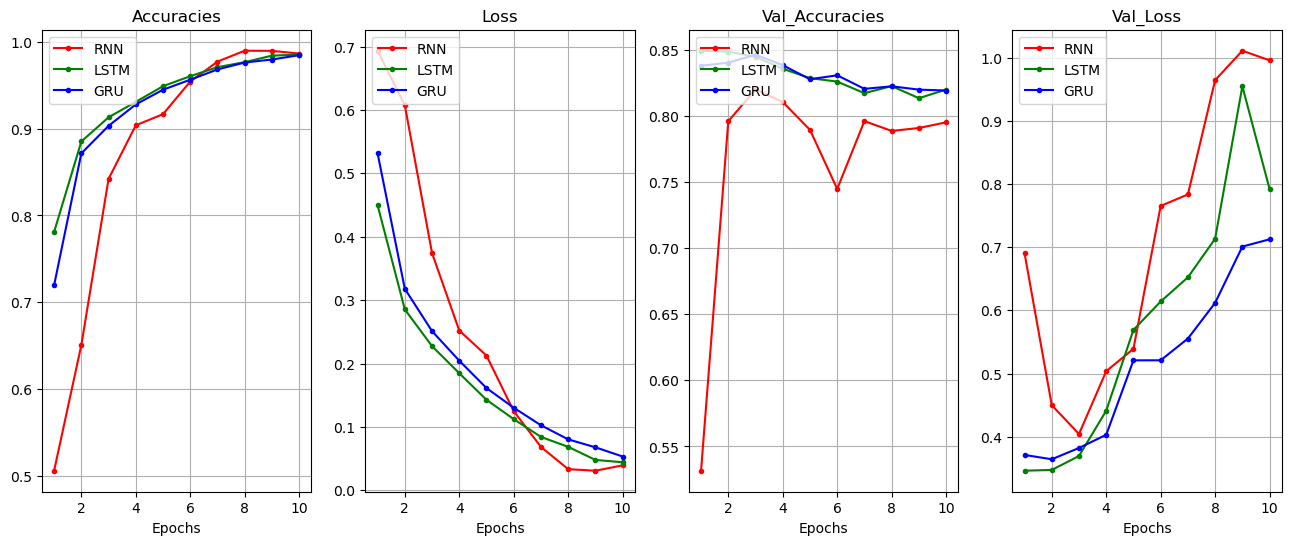

In [86]:
plt.figure(figsize=(16,6))
plt.subplot(1,4,1)
plt.title('Accuracies')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11), history.history['accuracy'], color='r', label='RNN',marker='.')
plt.plot(range(1,11), history1.history['accuracy'], color='g', label='LSTM',marker='.')
plt.plot(range(1,11), history2.history['accuracy'], color='b', label='GRU',marker='.')
plt.legend(loc='upper left')


plt.subplot(1,4,2)
plt.title('Loss')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11), history.history['loss'], color='r', label='RNN',marker='.')
plt.plot(range(1,11), history1.history['loss'], color='g', label='LSTM',marker='.')
plt.plot(range(1,11), history2.history['loss'], color='b', label='GRU',marker='.')
plt.legend(loc='upper left')


plt.subplot(1,4,3)
plt.title('Val_Accuracies')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11), history.history['val_accuracy'], color='r', label='RNN',marker='.')
plt.plot(range(1,11), history1.history['val_accuracy'], color='g', label='LSTM',marker='.')
plt.plot(range(1,11), history2.history['val_accuracy'], color='b', label='GRU',marker='.')
plt.legend(loc='upper left')


plt.subplot(1,4,4)
plt.title('Val_Loss')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11), history.history['val_loss'], color='r', label='RNN',marker='.')
plt.plot(range(1,11), history1.history['val_loss'], color='g', label='LSTM',marker='.')
plt.plot(range(1,11), history2.history['val_loss'], color='b', label='GRU',marker='.')
plt.legend(loc='upper left')

In [96]:
news1 = 'This was a worst movie. Please do not watch it. Waste of money and time.'
news2 = 'A must watch movie. I loved to eatch it. It was just amazing.'

In [97]:
def predict(model, text):
    sequences = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequences, maxlen=max_length,truncating = trunc_type)
    pred = model.predict(padded, verbose=False)
    percent_pos = pred[0,0]
    if round(percent_pos) == 0:
        return ((1-percent_pos), 'NEGATIVE')
    else:
        return(percent_pos, 'POSITIVE')


In [98]:
predict(model_rnn, news1), predict(model_rnn, news2)

((0.9999840553682589, 'NEGATIVE'), (0.9994976, 'POSITIVE'))

In [99]:
predict(model_lstm, news1), predict(model_lstm, news2)

((0.5028764307498932, 'NEGATIVE'), (0.5012570321559906, 'NEGATIVE'))

In [100]:
predict(model_gru, news1), predict(model_gru, news2)

((0.9988674389896914, 'NEGATIVE'), (0.984793, 'POSITIVE'))